## Policing in Schools
A look at whether school policing can predict graduation rates.

By Onel Abreu, Alexander Roche, Sabrina Sedovic

In [58]:
import pandas as pd

school_data = pd.read_csv("school_data.csv")
school_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Dept/Unit Number,Job Title_Chief Safety & Security OFF,Job Title_Flex Team Security Officer,Job Title_Safety And Security Off,Job Title_School Security Officer,Job Title_Senior School Security Officer,Job Title_Senior Security Officer,...,# of Unique Students Receiving OSS,% of Unique Students Receiving OSS,Average Length of OSS,# of Police Notifications,% of Misconducts Resulting in a Police Notification,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students
0,16,16,2012,26861,0,0,0,1,0,0,...,118.0,26.2,3.13,5.0,0.9,1.11,5.0,1.1,0.0,0.00
1,17,17,2013,26861,0,0,0,1,3,0,...,146.0,37.3,2.85,29.0,8.6,7.42,21.0,5.4,0.0,0.00
2,18,18,2014,26861,0,0,0,1,3,0,...,78.0,24.1,2.57,13.0,1.9,4.02,11.0,3.4,0.0,0.00
3,19,19,2015,26861,0,0,0,1,2,0,...,43.0,13.7,2.88,1.0,0.2,0.32,1.0,0.3,0.0,0.00
4,26,26,2012,41051,0,0,0,6,0,0,...,219.0,31.2,4.39,11.0,2.4,1.57,11.0,1.6,4.0,0.57
5,27,27,2013,41051,0,0,0,8,1,0,...,148.0,27.2,4.02,3.0,1.2,0.55,3.0,0.6,0.0,0.00
6,28,28,2014,41051,0,0,0,8,1,0,...,130.0,26.6,3.54,2.0,0.9,0.41,2.0,0.4,1.0,0.20
7,29,29,2015,41051,0,0,0,7,2,0,...,172.0,35.8,3.83,9.0,2.5,1.88,9.0,1.9,0.0,0.00
8,31,31,2012,41061,0,0,0,2,0,0,...,73.0,22.6,5.22,67.0,60.4,20.71,48.0,14.8,6.0,1.85
9,32,32,2013,41061,0,0,0,2,0,0,...,101.0,34.3,2.80,41.0,15.2,13.93,35.0,11.9,0.0,0.00


In [59]:
school_data = school_data.drop(columns = ["Unnamed: 0", "Unnamed: 0.1",
                                          "Dept/Unit Number", "Job Title_Chief Safety & Security OFF",
                                          "Job Title_Flex Team Security Officer",
                                          'Job Title_Safety And Security Off',
                                          'Job Title_Guidance Counselor Assistant',
                                          "Job Title_Career Counseling Manager",
                                          "Job Title_Director of Counseling",
                                          "Job Title_Director, School Counseling & Post Secondary Advising",
                                          "Job Title_HS Counseling Specialist", 
                                          "Job Title_K‐8 Counseling Specialist",
                                          "Job Title_Manager-Secdry Schl Counselng",
                                          'Job Title_Cntrl Office Security Officer',
                                          'Job Title_K-8 Counseling Specialist',"pos_name_0",
                                          "School_x", 'School Name_x',
                                          "School Name_y", "Total_y", 'School ID',
                                          "School Year"])

In [60]:
school_data.columns

Index(['Year', 'Job Title_School Security Officer',
       'Job Title_Senior School Security Officer',
       'Job Title_Senior Security Officer', 'Total Security',
       'Total Security_Filled', 'Job Title_School Counselor',
       'Total Counseling', 'Total Counseling_Filled', 'Total_x', 'Bilingual_N',
       'Bilingual_P', 'IEP_N', 'IEP_P', 'Free_Lunch_N', 'Free_Lunch_P',
       'Attendance', '5YR Grad Rate', 'White No', 'White Pct',
       'African American No', 'African American Pct',
       'Asian/Pacific Islander No', 'Asian/Pacific Islander Pct',
       'Native American/Alaskan No', 'Native American/Alaskan Pct',
       'Hispanic No', 'Hispanic Pct', 'Multi-Racial No', 'Multi-Racial Pct',
       'Asian No', 'Asian Pct', 'Hawaiian/Pacific Islander No',
       'Hawaiian/Pacific Islander Pct', 'Not Available No',
       'Not Available Pct', '# of Misconducts', '# of Group 1-2 Misconducts',
       '# of Group 3-4 Misconducts', '# of Group 5-6 Misconducts',
       '# of Suspensions

### Data Cleaning 

In [61]:
school_data.drop(school_data.loc[school_data["5YR Grad Rate"] == ' '].index, inplace=True)
school_data.dropna(subset=['5YR Grad Rate'], inplace=True)
school_data.reset_index(inplace=True)
school_data.drop("index", inplace=True, axis=1)
school_data.dropna(axis=0, inplace=True)
school_data['5YR Grad Rate'] =  school_data['5YR Grad Rate'].astype(float)

 ### Initial Data Analysis

In [68]:
school_data[["Total Security_Filled", "Total Counseling_Filled", "Total_x", "Expulsions per 100 Students"]].describe()

,Total Security_Filled,Total Counseling_Filled,Total_x,Expulsions per 100 Students
count,384.000000,384.000000,384.000000,384.000000
mean,5.942708,3.526042,1008.846354,0.159167
std,3.550729,2.678480,760.330071,0.333020
min,0.000000,0.000000,13.000000,0.000000
25%,3.000000,2.000000,462.750000,0.000000
50%,5.000000,3.000000,815.500000,0.000000
75%,8.000000,5.000000,1450.000000,0.180000
max,17.000000,15.000000,4366.000000,1.940000


In [69]:
school_data[['Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance', '5YR Grad Rate']]

,Bilingual_P,IEP_P,Free_Lunch_P,White Pct,African American Pct,Asian/Pacific Islander Pct,Native American/Alaskan Pct,Hispanic Pct,Multi-Racial Pct,Asian Pct,Hawaiian/Pacific Islander Pct,Not Available Pct,Attendance,5YR Grad Rate
0,0.044600,0.114600,0.955400,1.5,81.3,0.0,0.2,11.3,1.5,4.0,0.2,0.0,90.3,69.8
1,0.060800,0.163000,0.919700,2.2,84.2,0.0,0.0,9.0,2.2,2.4,0.0,0.0,86.9,84.2
2,0.053672,0.223164,0.949153,2.8,80.5,0.0,0.0,11.9,2.0,2.3,0.0,0.6,88.3,77.6
3,0.055200,0.260700,0.960100,2.5,82.2,0.0,0.0,11.0,2.5,1.8,0.0,0.0,90.2,80.6
4,0.000000,0.126900,0.945400,0.0,98.1,0.0,0.1,1.6,0.1,0.0,0.0,0.0,89.6,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.000000,0.101900,0.962300,0.4,97.0,0.0,0.0,1.1,1.1,0.4,0.0,0.0,88.5,83.5
380,0.017900,0.138400,0.933000,0.0,97.8,0.0,0.0,1.8,0.0,0.2,0.0,0.2,87.8,80.6
381,0.005000,0.069400,0.547100,16.4,51.1,0.0,0.2,25.5,3.5,2.0,0.3,1.2,97.0,81.1
382,0.005600,0.060900,0.314500,43.7,14.0,0.0,0.6,21.6,4.9,15.1,0.1,0.0,92.9,95.3


In [70]:
school_data_analysis.groupby("Year")[['Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance', '5YR Grad Rate']].mean()

,Bilingual_P,IEP_P,Free_Lunch_P,White Pct,African American Pct,Asian/Pacific Islander Pct,Native American/Alaskan Pct,Hispanic Pct,Multi-Racial Pct,Asian Pct,Hawaiian/Pacific Islander Pct,Not Available Pct,Attendance,5YR Grad Rate
Year,,,,,,,,,,,,,,
2012-01-01,0.053415,0.178015,0.905297,5.840541,55.393243,0.014865,0.272973,34.412162,0.940541,2.793243,0.083784,0.241892,81.870270,59.190541
2013-01-01,0.060286,0.174456,0.887768,6.642254,51.887324,0.014085,0.315493,36.490141,1.042254,3.202817,0.078873,0.330986,84.619718,64.667606
2014-01-01,0.064214,0.176769,0.854299,6.498864,50.953409,0.022727,0.327273,37.463636,0.993182,3.104545,0.112500,0.535227,86.907955,67.480682
2015-01-01,0.066168,0.184362,0.879609,7.056962,51.282278,0.008861,0.394937,36.606329,1.003797,3.178481,0.100000,0.377215,88.001266,70.569620
2016-01-01,0.074279,0.176421,0.859235,6.965278,49.581944,0.006944,0.245833,38.259722,1.047222,3.440278,0.088889,0.380556,88.312500,75.626389


In [71]:
school_data_analysis.groupby("Year")[["Total Security_Filled", "Total Counseling_Filled", "Total_x", "# of Students Expelled"]].sum()

,Total Security_Filled,Total Counseling_Filled,Total_x,# of Students Expelled
Year,,,,
2012-01-01,393,300,79836,192.0
2013-01-01,487,280,77702,119.0
2014-01-01,490,273,87236,72.0
2015-01-01,452,260,74961,48.0
2016-01-01,460,241,67662,60.0


Some initial notes from the preliminary data analysis:
- Filled security positions have remained somewhat consistent over the years, with a sudden increase in 2013 and then relatively around the same amount for the following year
- Counselors, however, have steadily fallen over the 5 year span being examined.
- Total amount of students at CPS schools also decreased suddenly in 2016, and had a sudden increase in 2014.
- Total suspensions have also dropped extremely since 2012, due to new policy enacted to ensure students were only being expelled with due process.
- Percentage of African American students have decreased, while Percentage of Hispanic students have increased (Bilingual students have also increased alongside this).
- Percentage of Free and Reduced lunch students has decreased
- Attendance, in general, was on the rise, along with an extreme rise in 5 year graduation rates.

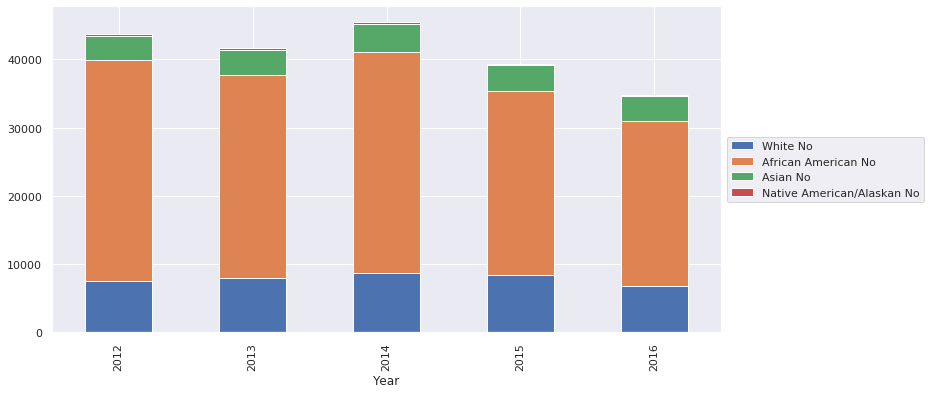

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(11.7,8.27)})

total = school_data_analysis.groupby('Year')[['White No', 
                                              'African American No', 
                                              'Asian No',
                                               'Native American/Alaskan No',
                                               ]].sum().reset_index()
total["Year"] = total["Year"].dt.year

plot = total.plot.bar(stacked=True, x='Year', figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.show()

### Pipeline

In [73]:
import grid_search

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
models = {"LinearRegression" : LinearRegression(),
          "Ridge" : Ridge(),
          "Lasso" : Lasso(),
          "ElasticNet" : ElasticNet()}

p_grid = {"LinearRegression" : [{}],
          "Ridge" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "Lasso" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "ElasticNet" : [{"alpha" : x,
                         "l1_ratio" : y} 
                          for x in [.1, 1, 10, 100, 1000] 
                          for y in [.1, .3, .5, .7, .9]]}

In [76]:
test_results = grid_search.choose_and_test_model(school_data, models, p_grid)

### Evaluation

In [77]:
test_results

,CV,RMSE,MAE,R^2
0,0,9.510247,7.428074,0.658257
0,1,9.190945,6.841799,0.647275
0,2,11.304521,9.696336,0.403849
0,Average,10.001904,7.988737,0.569794
